<b>Introduction to our data:</b>

<b>Data Acquisition:</b>

In [ ]:
#data acquisition code

<b>Data Persistence - Azure Database:</b>

In [ ]:
#code to persist data using sqlalchemy

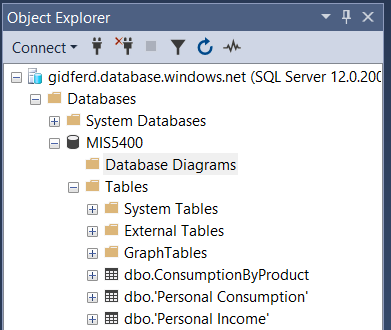

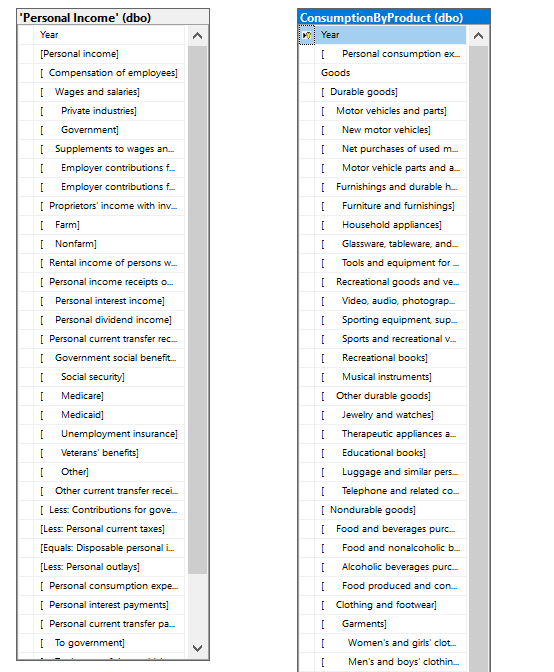

<b>The API and Container:</b>

<b>Retrieve data from the api:</b>

In [2]:
import pandas as pd
expenses = pd.read_json('http://mis5400.westus.azurecontainer.io:5000/api/v1/expenses')
income = pd.read_json('http://mis5400.westus.azurecontainer.io:5000/api/v1/income')

<b>Convert python dictionary to DataFrame:</b>

In [3]:
df1 = pd.DataFrame.from_dict(income, orient='columns')
df2 = pd.DataFrame.from_dict(expenses, orient='columns')

In [4]:
dfIncome = df1.set_index('Year')
dfExpenses = df2.set_index('Year')

<b>Exploration of the Data:</b>

In [18]:
list(dfIncome)

['Personal income',
 '  Compensation of employees',
 '    Wages and salaries',
 '      Private industries',
 '      Government',
 '    Supplements to wages and salaries',
 '      Employer contributions for employee pension and insurance ',
 '      Employer contributions for government social insurance',
 "  Proprietors' income with inventory valuation and capital consu",
 '    Farm',
 '    Nonfarm',
 '  Rental income of persons with capital consumption adjustment',
 '  Personal income receipts on assets',
 '    Personal interest income',
 '    Personal dividend income',
 '  Personal current transfer receipts',
 '    Government social benefits to persons',
 '      Social security',
 '      Medicare',
 '      Medicaid',
 '      Unemployment insurance',
 "      Veterans' benefits",
 '      Other',
 '    Other current transfer receipts, from business (net)',
 '  Less: Contributions for government social insurance, domestic',
 'Less: Personal current taxes',
 'Equals: Disposable personal in

In [42]:
list(dfExpenses)

['      Personal consumption expenditures',
 'Goods',
 '  Durable goods',
 '    Motor vehicles and parts',
 '      New motor vehicles',
 '      Net purchases of used motor vehicles',
 '      Motor vehicle parts and accessories',
 '    Furnishings and durable household equipment',
 '      Furniture and furnishings',
 '      Household appliances',
 '      Glassware, tableware, and household utensils',
 '      Tools and equipment for house and garden',
 '    Recreational goods and vehicles',
 '      Video, audio, photographic, and information processing equ',
 '      Sporting equipment, supplies, guns, and ammunition',
 '      Sports and recreational vehicles',
 '      Recreational books',
 '      Musical instruments',
 '    Other durable goods',
 '      Jewelry and watches',
 '      Therapeutic appliances and equipment',
 '      Educational books',
 '      Luggage and similar personal items',
 '      Telephone and related communication equipment',
 '  Nondurable goods',
 '    Food and be

Simplify Categories:

In [5]:
dfExpenseSimplified = dfExpenses.filter(['    Motor vehicles and parts',
                                         '    Furnishings and durable household equipment',
                                         '    Recreational goods and vehicles',
                                         '    Other durable goods',
                                         '    Food and beverages purchased for off-premises consumption',
                                         '    Clothing and footwear',
                                         '    Gasoline and other energy goods',
                                         '    Other nondurable goods',
                                         '    Housing and utilities',
                                         '    Health care',
                                         '    Transportation services',
                                         '    Recreation services',
                                         '    Food services and accommodations',
                                         '    Financial services and insurance',
                                         '        Higher education'
                                        ], axis = 1)
list(dfExpenseSimplified)

['    Motor vehicles and parts',
 '    Furnishings and durable household equipment',
 '    Recreational goods and vehicles',
 '    Other durable goods',
 '    Food and beverages purchased for off-premises consumption',
 '    Clothing and footwear',
 '    Gasoline and other energy goods',
 '    Other nondurable goods',
 '    Housing and utilities',
 '    Health care',
 '    Transportation services',
 '    Recreation services',
 '    Food services and accommodations',
 '    Financial services and insurance',
 '        Higher education']

In [7]:
dfIncomeSimplified = dfIncome.filter(['  Compensation of employees',
 "  Proprietors' income with inventory valuation and capital consu",
 '    Farm',
 '    Nonfarm',
 '  Rental income of persons with capital consumption adjustment',
 '  Personal income receipts on assets',
 '  Personal current transfer receipts',
 '    Government social benefits to persons'
                                        ], axis = 1)
list(dfIncomeSimplified)

['  Compensation of employees',
 "  Proprietors' income with inventory valuation and capital consu",
 '    Farm',
 '    Nonfarm',
 '  Rental income of persons with capital consumption adjustment',
 '  Personal income receipts on assets',
 '  Personal current transfer receipts',
 '    Government social benefits to persons']

<b>US Income</b>

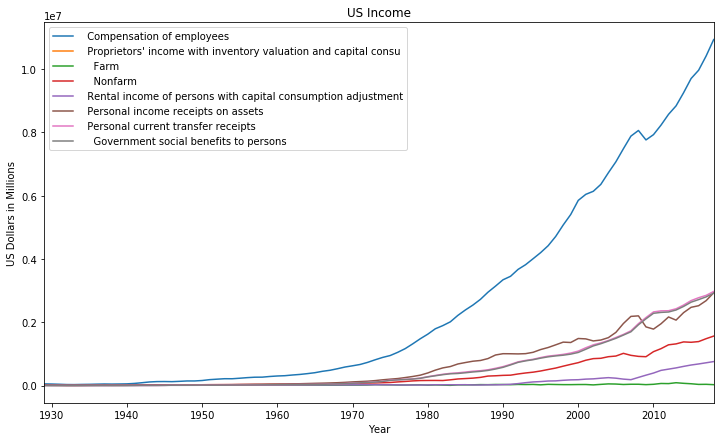

In [10]:
plt.figure(figsize=(12,7))
ax = plt.gca()

dfIncomeSimplified.plot(kind='line', ax=ax)

plt.title('US Income')
plt.xlabel('Year')
plt.ylabel('US Dollars in Millions')
#ax.get_legend().remove()

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

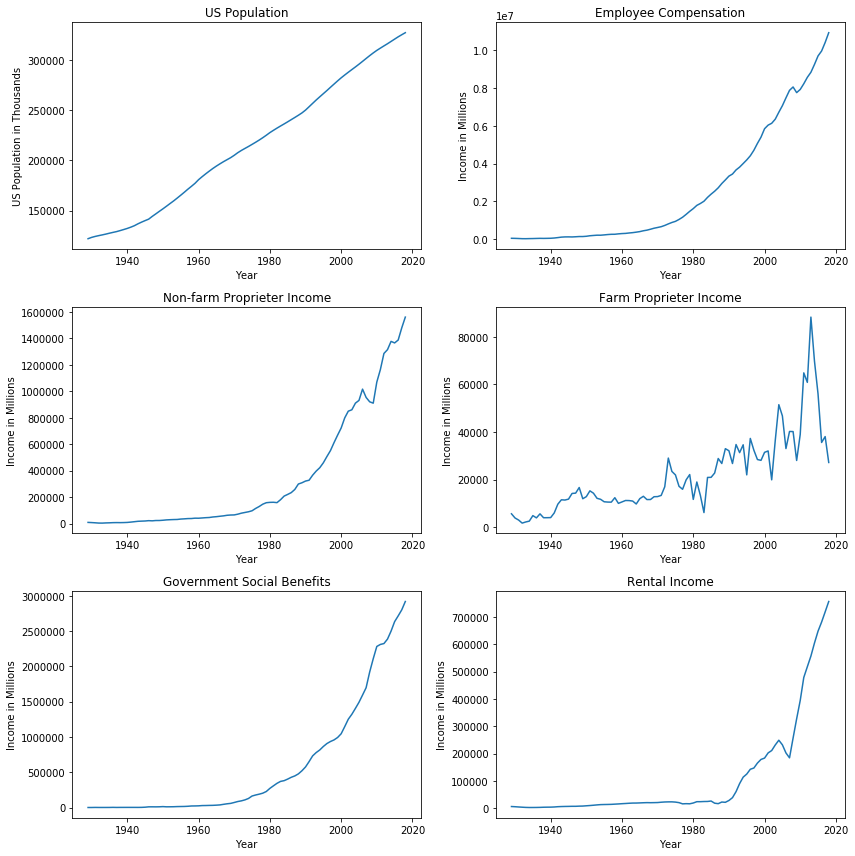

In [22]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,12))

plt.subplot(3,2,4)
plt.plot(dfIncome['    Farm'] )
plt.title('Farm Proprieter Income')
plt.xlabel('Year')
plt.ylabel('Income in Millions')

plt.subplot(3,2,1)
plt.plot(dfIncome['  Population_in_thousands'])
plt.title('US Population')
plt.xlabel('Year')
plt.ylabel('US Population in Thousands')

plt.subplot(3,2,2)
plt.plot(dfIncome['  Compensation of employees'] )
plt.title('Employee Compensation')
plt.xlabel('Year')
plt.ylabel('Income in Millions')

plt.subplot(3,2,3)
plt.plot(dfIncome['    Nonfarm'] )
plt.title('Non-farm Proprieter Income')
plt.xlabel('Year')
plt.ylabel('Income in Millions')

plt.subplot(3,2,5)
plt.plot(dfIncome['    Government social benefits to persons'] )
plt.title('Government Social Benefits')
plt.xlabel('Year')
plt.ylabel('Income in Millions')

plt.subplot(3,2,6)
plt.plot(dfIncome['  Rental income of persons with capital consumption adjustment'] )
plt.title('Rental Income')
plt.xlabel('Year')
plt.ylabel('Income in Millions')

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

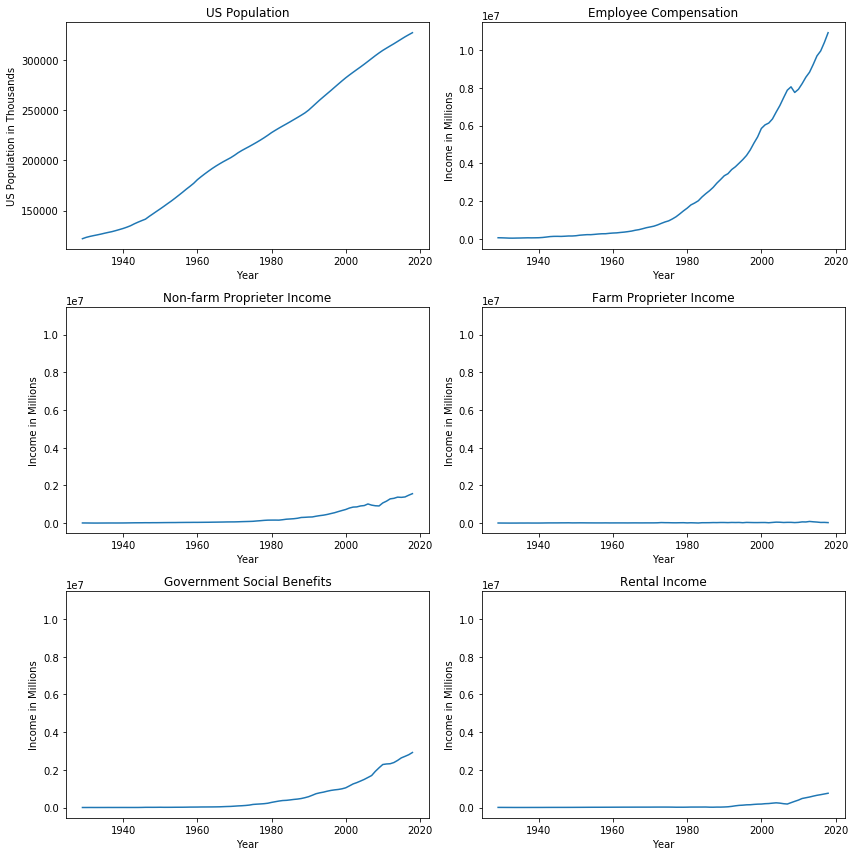

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
plt.plot(dfIncome['  Population_in_thousands'])
plt.title('US Population')
plt.xlabel('Year')
plt.ylabel('US Population in Thousands')

ax1 = plt.subplot(3,2,2)
plt.plot(dfIncome['  Compensation of employees'] )
plt.title('Employee Compensation')
plt.xlabel('Year')
plt.ylabel('Income in Millions')

plt.subplot(3,2,3,sharey=ax1)
plt.plot(dfIncome['    Nonfarm'] )
plt.title('Non-farm Proprieter Income')
plt.xlabel('Year')
plt.ylabel('Income in Millions')

plt.subplot(3,2,4,sharey=ax1)
plt.plot(dfIncome['    Farm'] )
plt.title('Farm Proprieter Income')
plt.xlabel('Year')
plt.ylabel('Income in Millions')

plt.subplot(3,2,5,sharey=ax1)
plt.plot(dfIncome['    Government social benefits to persons'] )
plt.title('Government Social Benefits')
plt.xlabel('Year')
plt.ylabel('Income in Millions')

plt.subplot(3,2,6,sharey=ax1)
plt.plot(dfIncome['  Rental income of persons with capital consumption adjustment'] )
plt.title('Rental Income')
plt.xlabel('Year')
plt.ylabel('Income in Millions')

plt.tight_layout()
plt.show

<b>Normalize Population, Income Data:</b>

In [89]:
PopulationIncome = dfIncome[['Personal income', '  Population_in_thousands' ]]

In [92]:
list(PopulationIncome)

['Personal income', '  Population_in_thousands']

Text(0.5, 1.0, 'Normalized Population and Income Comparison')

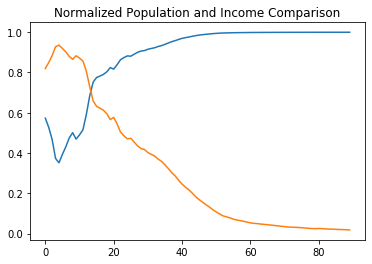

In [97]:
# Normalize the data attributes.
from sklearn import preprocessing

normalized_PopulationIncome = preprocessing.normalize(PopulationIncome)


plt.plot(normalized_PopulationIncome)
plt.title('Normalized Population and Income Comparison')


<b>Consumption</b>

<b>Basket Analysis of Expenses - Correlation:</b>

In [31]:
ExpenseCorr = dfExpenseSimplified.corr(method ='pearson') 

<b>Heat Map of Consumption Correlation on itself:</b>

<b>Higher Education consumption is possitively correlated with Healthcare consumption and negatively correlated with Motor vehicle and parts consumption and Clothing and Footwear.</b>

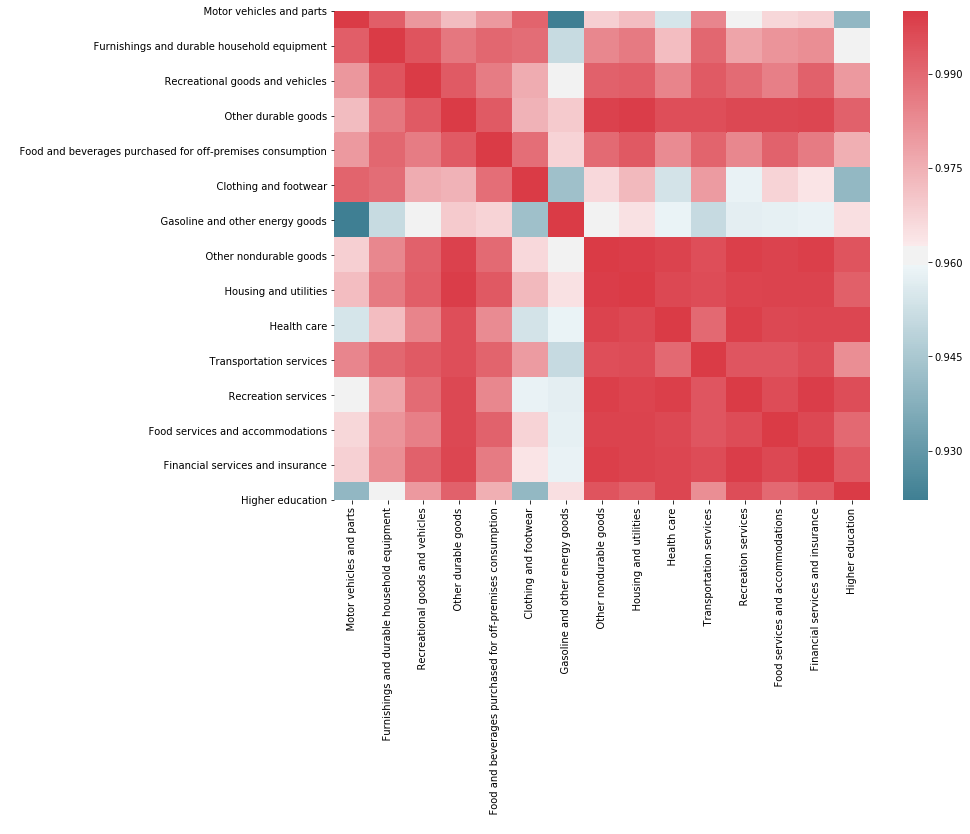

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
sns.heatmap(ExpenseCorr, xticklabels=ExpenseCorr.columns, yticklabels=ExpenseCorr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

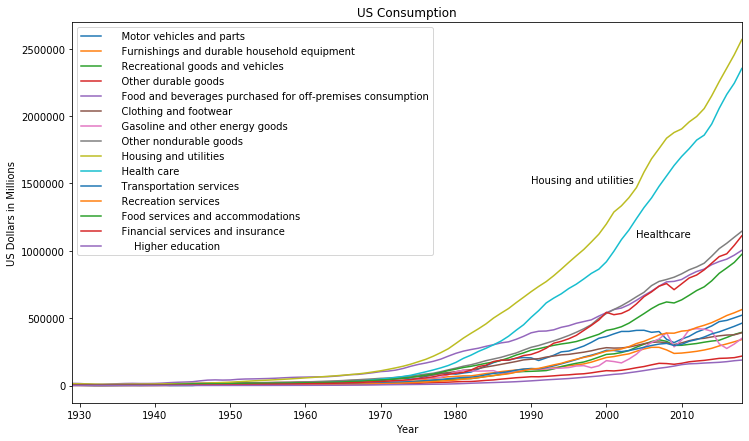

In [103]:
plt.figure(figsize=(12,7))
ax = plt.gca()

dfExpenseSimplified.plot(kind='line', ax=ax)

plt.title('US Consumption')
plt.xlabel('Year')
plt.ylabel('US Dollars in Millions')
#ax.get_legend().remove()

plt.text(1990, 1500000, 'Housing and utilities')
plt.text(2004, 1100000, 'Healthcare')
plt.show()

<b>Motor Vehicle Consumption:</b>

In [85]:
dfConsumptionMotorVehicles = dfExpenses.filter(['      New motor vehicles',
 '      Net purchases of used motor vehicles',
 '      Motor vehicle parts and accessories'], axis = 1)

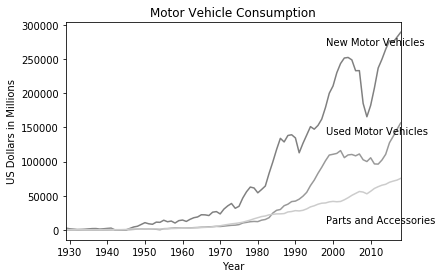

In [21]:
ax = plt.gca()

dfConsumptionMotorVehicles.plot(kind='line', y='      New motor vehicles', Label= 'New Motor Vehicles', color= '.5', ax=ax)
dfConsumptionMotorVehicles.plot(kind='line', y='      Net purchases of used motor vehicles', label= 'Used Motor Vehicles', color='.6', ax=ax)
dfConsumptionMotorVehicles.plot(kind='line', y='      Motor vehicle parts and accessories', label= 'Parts and Accessories', color='.8', ax=ax)
plt.text(1998, 270000, 'New Motor Vehicles')
plt.text(1998, 140000, 'Used Motor Vehicles')
plt.text(1998, 10000, 'Parts and Accessories')
plt.title('Motor Vehicle Consumption')
plt.xlabel('Year')
plt.ylabel('US Dollars in Millions')
ax.get_legend().remove()

plt.show()

<b>Comparison of Income to Housing and Healthcare Consumption</b>

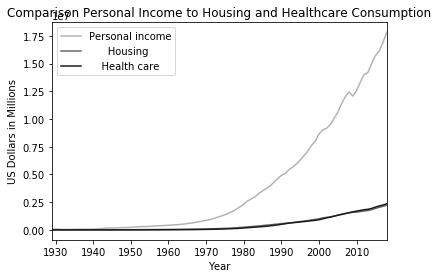

In [177]:
ax = plt.gca()
dfIncome.plot(kind='line', y = 'Personal income', color='.7', ax=ax)
dfExpenses.plot(kind='line', y = '      Housing', color= '.4', ax=ax)
dfExpenses.plot(kind='line', y = '    Health care', color= '.1', ax=ax)
plt.title('Comparison Personal Income to Housing and Healthcare Consumption')
plt.xlabel('Year')
plt.ylabel('US Dollars in Millions')

plt.show()

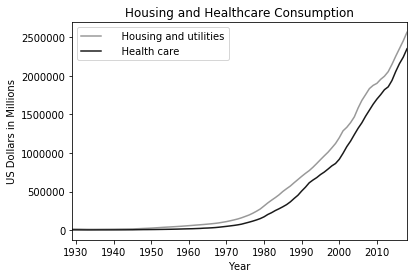

In [42]:
ax = plt.gca()
dfExpenseSimplified.plot(kind='line', y = '    Housing and utilities', color= '.6', ax=ax)
dfExpenseSimplified.plot(kind='line', y = '    Health care', color= '.1', ax=ax)
plt.title('Housing and Healthcare Consumption')
plt.xlabel('Year')
plt.ylabel('US Dollars in Millions')

plt.show()

<b>Comparison of Income, Housing, and Healthcare Magnitude</b>

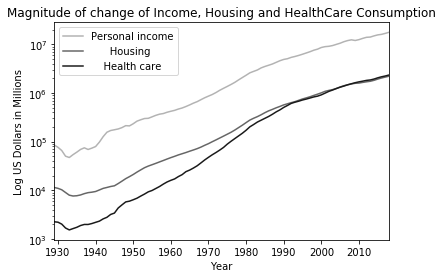

In [98]:
import matplotlib.pyplot as plt

ax = plt.gca()
dfIncome.plot(kind='line', y = 'Personal income', color='.7', ax=ax)
dfExpenses.plot(kind='line', y = '      Housing', color= '.4', ax=ax)
dfExpenses.plot(kind='line', y = '    Health care', color= '.1', ax=ax)
plt.title('Magnitude of change of Income, Housing and HealthCare Consumption')
plt.xlabel('Year')
plt.ylabel('Log US Dollars in Millions')
plt.yscale('log')


plt.show()

In [25]:
IncomeHousing = pd.merge(left=dfIncome['Personal income'],right=dfExpenses['      Housing'], left_on= 'Year', right_on='Year')

In [26]:
IncomeHousingHealthcare = pd.merge(left=IncomeHousing, right=dfExpenses['    Health care'], left_on='Year', right_on='Year') 

In [27]:
#float(IncomeHousingHealthcare.mean(axis=0))
IncomeHousingHealthcare.mean(axis=0)

Personal income    4.024621e+06
      Housing      4.859735e+05
    Health care    4.657982e+05
dtype: float64

In [60]:
list(IncomeHousingHealthcare)

['Personal income', '      Housing', '    Health care']

<b>Normalize Income, Housing, and HealthCare Data</b>

In [38]:
# Normalize the data attributes.
from sklearn import preprocessing

print(IncomeHousingHealthcare.shape)
# separate the data from the target attributes
#y = iris.target
#x = iris.data
# normalize the data attributes
normalized_IncomeHousingHealthcare = preprocessing.normalize(IncomeHousingHealthcare)


(90, 3)


Text(0.5, 1.0, 'Normalized Income, Housing, and Healthcare')

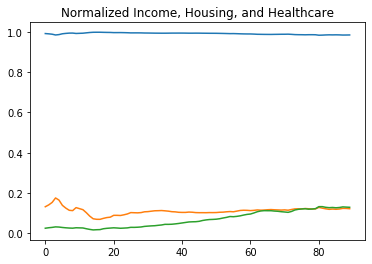

In [37]:
plt.plot(normalized_IncomeHousingHealthcare)
plt.title('Normalized Income, Housing, and Healthcare')

<b>Housing and Healthcare Consumption as a percent of Personal Income:</b>

Text(0, 0.5, 'Percent')

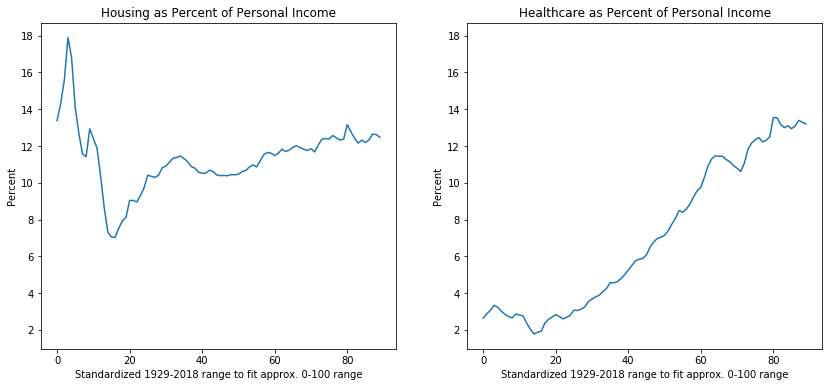

In [79]:
x=IncomeHousingHealthcare['      Housing']
y=IncomeHousingHealthcare['Personal income']
HousingAsPercentOfIncome = lambda x,y: x/y*100

vfunc_Housing = np.vectorize(HousingAsPercentOfIncome)

plt.figure(figsize=(14,6))
axp=plt.subplot(1,2,1)
plt.plot(vfunc_Housing(x,y))
plt.title('Housing as Percent of Personal Income')
plt.xlabel('Standardized 1929-2018 range to fit approx. 0-100 range')
plt.ylabel('Percent')

a=IncomeHousingHealthcare['    Health care']
b=IncomeHousingHealthcare['Personal income']
HealthcareAsPercentOfIncome = lambda a,b: a/b*100

vfunc_Healthcare = np.vectorize(HealthcareAsPercentOfIncome)

plt.subplot(1,2,2, sharey = axp)
plt.plot(vfunc_Healthcare(a,b))
plt.title('Healthcare as Percent of Personal Income')
plt.xlabel('Standardized 1929-2018 range to fit approx. 0-100 range')
plt.ylabel('Percent')

<b> Total US Housing Consumption hovers around 12% of Personal Income. Healthcare hovers around 13%.

In [ ]:
#Divide this by the total population?

In [27]:
from platform import python_version

print(python_version())

import sys
sys.executable

3.7.4


'C:\\Users\\Kristen\\Anaconda3\\python.exe'